# Chapter 2.8

Dang Thanh Vu - ID: 197796

# Function

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

def plot_decision(X_train, X, model):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Plot the decision boundary. For that, we will assign a color to each
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.plot(X[0][:,0], X[0][:,1], 'bo')
    plt.plot(X[1][:,0], X[1][:,1], 'r+')
    plt.show()
    

# Exercise 2.8.1

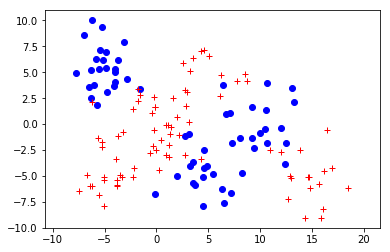

In [207]:
m1 = np.array([[-5, 5], [5, -5], [10, 0]])
m2 = np.array([[-5, -5], [0, 0], [5, 5], [15, -5]])
sigma = 4*np.identity((2))
S1 = np.array([sigma, sigma, sigma])
S2 = np.array([sigma, sigma, sigma, sigma])
P1 = np.array(3*[1/3])
P2 = np.array(4*[0.25])
N1 = 60
N2 = 80
X1, Y1 = random_MixtureGaussian(N1, P1, m1, S1, 1)
X2, Y2 = random_MixtureGaussian(N2, P2, m2, S2, -1)
X_train = np.concatenate([X1, X2])
Y_train =  np.concatenate([Y1, Y2])

X1_test, Y1_test = random_MixtureGaussian(N1, P1, m1, S1, 1)
X2_test, Y2_test = random_MixtureGaussian(N2, P2, m2, S2, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test =np.concatenate([Y1_test, Y2_test])

plt.axis('equal')
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7928571428571428


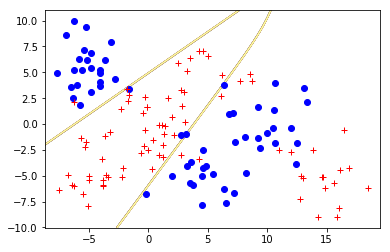

In [208]:
model1 = MLPClassifier(hidden_layer_sizes=(2), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='constant', learning_rate_init=0.01, tol=0, max_iter=9000)
model1.fit(X_train, Y_train)
Y_predict = model1.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))

plot_decision(X_train, [X1, X2], model1)


c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9571428571428572


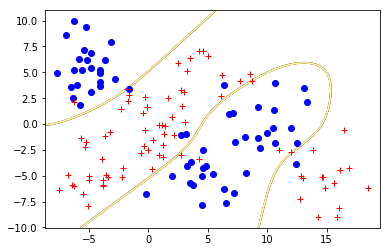

In [209]:
model2 = MLPClassifier(hidden_layer_sizes=(4), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='constant', learning_rate_init=0.01, max_iter=9000, tol=0)
model2.fit(X_train, Y_train)
Y_predict = model2.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))

plot_decision(X_train, [X1, X2], model2)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7214285714285714


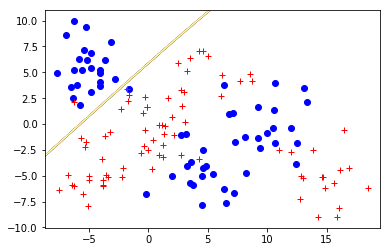

In [210]:
model3 = MLPClassifier(hidden_layer_sizes=(2), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='constant', learning_rate_init=0.0001, max_iter=9000, tol=0, early_stopping=False)
model3.fit(X_train, Y_train)
Y_predict = model3.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))

plot_decision(X_train, [X1, X2], model3)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.75


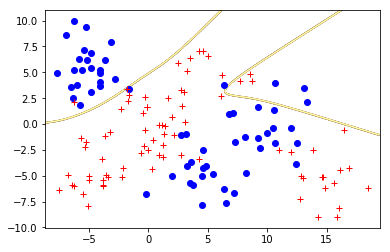

In [212]:
model4 = MLPClassifier(hidden_layer_sizes=(4), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='constant', learning_rate_init=0.0001, max_iter=9000, tol=0, early_stopping=False)
model4.fit(X_train, Y_train)
Y_predict = model4.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))

plot_decision(X_train, [X1, X2], model4)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6285714285714286


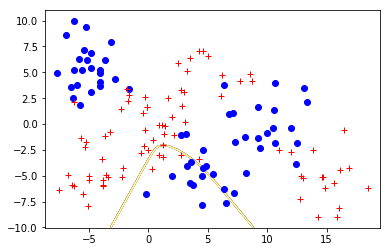

In [213]:
model5 = MLPClassifier(hidden_layer_sizes=(2), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.0001, max_iter=6000, tol=0, early_stopping=False)
model5.fit(X_train, Y_train)
Y_predict = model5.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))

plot_decision(X_train, [X1, X2], model5)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6714285714285714


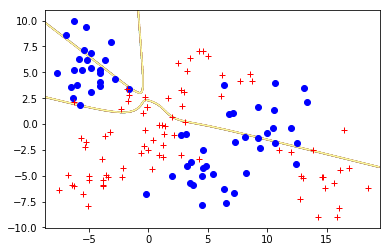

In [214]:
model6 = MLPClassifier(hidden_layer_sizes=(4), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.0001, max_iter=6000, tol=0, early_stopping=False)
model6.fit(X_train, Y_train)
Y_predict = model6.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model6)

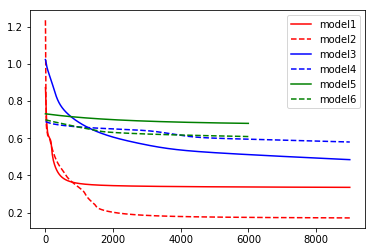

In [216]:
plt.plot(model1.loss_curve_, 'r-', label="model1")
plt.plot(model2.loss_curve_, 'r--', label="model2")
plt.plot(model3.loss_curve_, 'b-', label="model3")
plt.plot(model4.loss_curve_, 'b--', label="model4")
plt.plot(model5.loss_curve_, 'g-', label="model5")
plt.plot(model6.loss_curve_, 'g--', label="model6")
plt.legend()
plt.show()

# Exercise 2.8.2

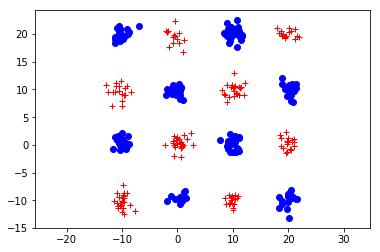

In [217]:
m1 = np.array([[-10, 0], [0, -10], [10, 0], [0, 10], [-10, 20], [10, 20], [20, 10], [20, -10]])
m2 = np.array([[-10, -10], [0, 0], [10, -10], [-10, 10], [10, 10], [20, 20], [20, 0], [0, 20]])
sigma = np.identity((2))
S1 = np.array([sigma, sigma, sigma, sigma, sigma, sigma, sigma, sigma])
S2 = np.array([sigma, sigma, sigma, sigma, sigma, sigma, sigma, sigma])
P1 = np.array(8*[1/8])
P2 = np.array(8*[1/8])
N1 = 160
N2 = 160
X1, Y1 = random_MixtureGaussian(N1, P1, m1, S1, 1)
X2, Y2 = random_MixtureGaussian(N2, P2, m2, S2, -1)
X_train = np.concatenate([X1, X2])
Y_train =  np.concatenate([Y1, Y2])

X1_test, Y1_test = random_MixtureGaussian(N1, P1, m1, S1, 1)
X2_test, Y2_test = random_MixtureGaussian(N2, P2, m2, S2, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test =np.concatenate([Y1_test, Y2_test])

plt.axis('equal')
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.984375


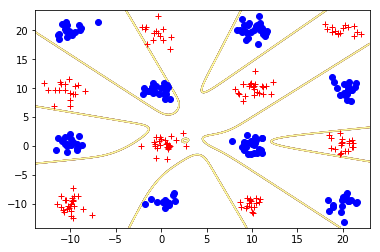

In [220]:
model1 = MLPClassifier(hidden_layer_sizes=(7), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model1.fit(X_train, Y_train)
Y_predict = model1.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model1)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.94375


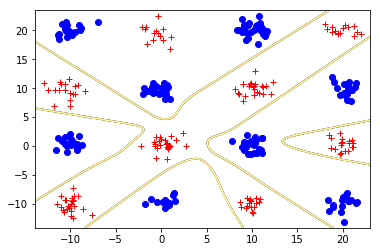

In [221]:
model2 = MLPClassifier(hidden_layer_sizes=(8), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model2.fit(X_train, Y_train)
Y_predict = model2.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model2)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0


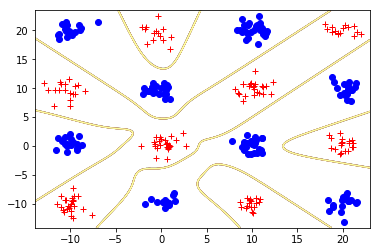

In [223]:
model3 = MLPClassifier(hidden_layer_sizes=(10), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model3.fit(X_train, Y_train)
Y_predict = model3.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model3)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0


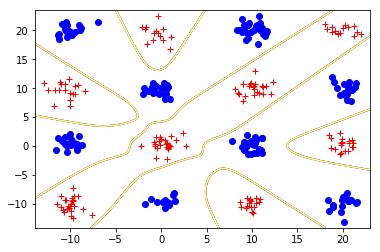

In [224]:
model4 = MLPClassifier(hidden_layer_sizes=(14), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model4.fit(X_train, Y_train)
Y_predict = model4.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model4)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0


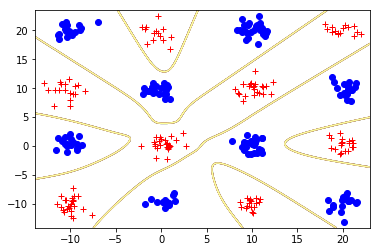

In [225]:
model5 = MLPClassifier(hidden_layer_sizes=(16), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model5.fit(X_train, Y_train)
Y_predict = model5.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model5)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0


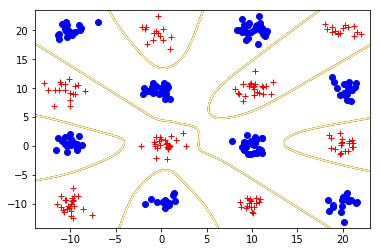

In [226]:
model6 = MLPClassifier(hidden_layer_sizes=(20), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model6.fit(X_train, Y_train)
Y_predict = model6.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model6)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0


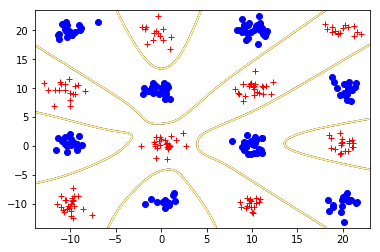

In [227]:
model7 = MLPClassifier(hidden_layer_sizes=(32), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model7.fit(X_train, Y_train)
Y_predict = model7.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model7)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0


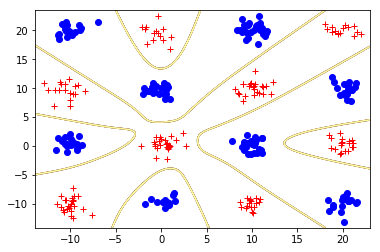

In [228]:
model8 = MLPClassifier(hidden_layer_sizes=(40), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model8.fit(X_train, Y_train)
Y_predict = model8.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model8)

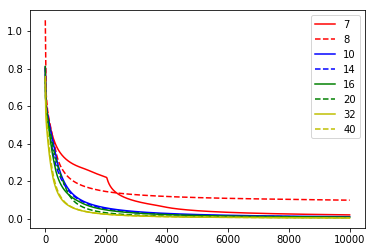

In [235]:
plt.plot(model1.loss_curve_, 'r-', label="7")
plt.plot(model2.loss_curve_, 'r--', label="8")
plt.plot(model3.loss_curve_, 'b-', label="10")
plt.plot(model4.loss_curve_, 'b--', label="14")
plt.plot(model5.loss_curve_, 'g-', label="16")
plt.plot(model6.loss_curve_, 'g--', label="20")
plt.plot(model7.loss_curve_, 'y-', label="32")
plt.plot(model8.loss_curve_, 'y--', label="40")
plt.legend()
plt.show()

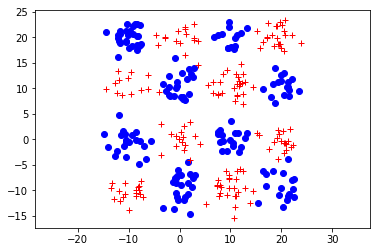

In [236]:
m1 = np.array([[-10, 0], [0, -10], [10, 0], [0, 10], [-10, 20], [10, 20], [20, 10], [20, -10]])
m2 = np.array([[-10, -10], [0, 0], [10, -10], [-10, 10], [10, 10], [20, 20], [20, 0], [0, 20]])
sigma = 4*np.identity((2))
S1 = np.array([sigma, sigma, sigma, sigma, sigma, sigma, sigma, sigma])
S2 = np.array([sigma, sigma, sigma, sigma, sigma, sigma, sigma, sigma])
P1 = np.array(8*[1/8])
P2 = np.array(8*[1/8])
N1 = 160
N2 = 160
X1, Y1 = random_MixtureGaussian(N1, P1, m1, S1, 1)
X2, Y2 = random_MixtureGaussian(N2, P2, m2, S2, -1)
X_train = np.concatenate([X1, X2])
Y_train =  np.concatenate([Y1, Y2])

X1_test, Y1_test = random_MixtureGaussian(N1, P1, m1, S1, 1)
X2_test, Y2_test = random_MixtureGaussian(N2, P2, m2, S2, -1)
X_test = np.concatenate([X1_test, X2_test])
Y_test =np.concatenate([Y1_test, Y2_test])

plt.axis('equal')
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'r+')
plt.show()

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8125


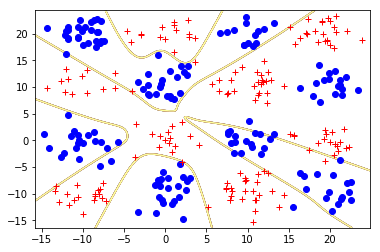

In [237]:
model1 = MLPClassifier(hidden_layer_sizes=(7), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model1.fit(X_train, Y_train)
Y_predict = model1.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model1)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.85


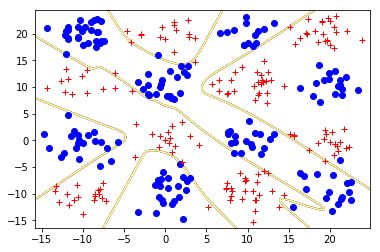

In [238]:
model2 = MLPClassifier(hidden_layer_sizes=(8), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model2.fit(X_train, Y_train)
Y_predict = model2.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model2)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.93125


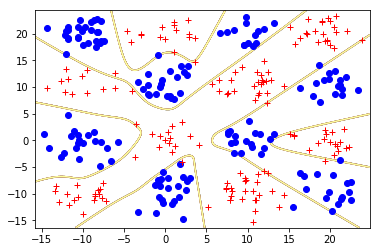

In [239]:
model3 = MLPClassifier(hidden_layer_sizes=(10), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model3.fit(X_train, Y_train)
Y_predict = model3.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model3)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.940625


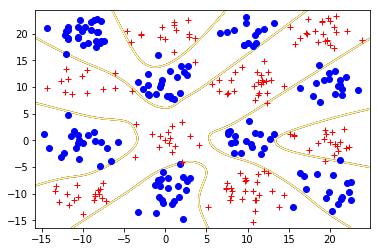

In [240]:
model4 = MLPClassifier(hidden_layer_sizes=(14), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model4.fit(X_train, Y_train)
Y_predict = model4.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model4)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9375


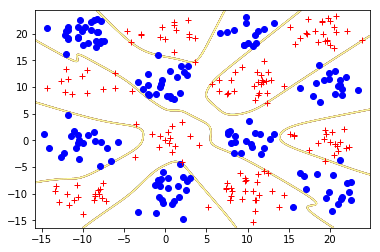

In [241]:
model5 = MLPClassifier(hidden_layer_sizes=(16), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model5.fit(X_train, Y_train)
Y_predict = model5.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model5)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.940625


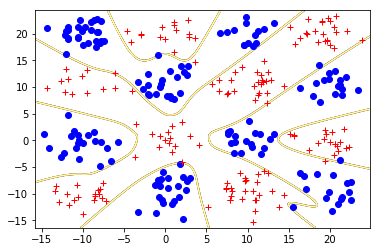

In [242]:
model6 = MLPClassifier(hidden_layer_sizes=(20), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model6.fit(X_train, Y_train)
Y_predict = model6.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model6)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9375


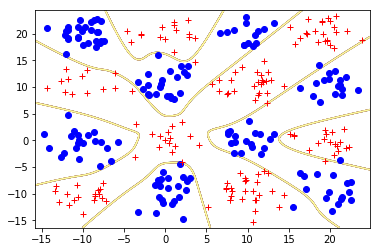

In [243]:
model7 = MLPClassifier(hidden_layer_sizes=(32), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model7.fit(X_train, Y_train)
Y_predict = model7.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model7)

c:\users\vu-icdsp\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.94375


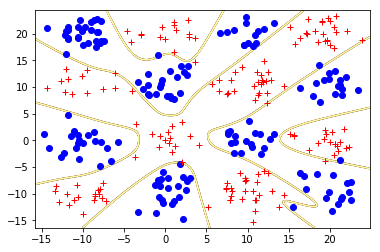

In [244]:
model8 = MLPClassifier(hidden_layer_sizes=(40), activation='tanh', solver='sgd', batch_size=(N1+N2), learning_rate='adaptive', learning_rate_init=0.01, max_iter=10000, tol=0)
model8.fit(X_train, Y_train)
Y_predict = model8.predict(X_test)
print(np.sum(Y_predict==Y_test)/(N1 + N2))
plot_decision(X_train, [X1, X2], model8)

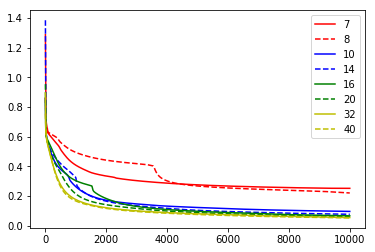

In [245]:
plt.plot(model1.loss_curve_, 'r-', label="7")
plt.plot(model2.loss_curve_, 'r--', label="8")
plt.plot(model3.loss_curve_, 'b-', label="10")
plt.plot(model4.loss_curve_, 'b--', label="14")
plt.plot(model5.loss_curve_, 'g-', label="16")
plt.plot(model6.loss_curve_, 'g--', label="20")
plt.plot(model7.loss_curve_, 'y-', label="32")
plt.plot(model8.loss_curve_, 'y--', label="40")
plt.legend()
plt.show()